In [24]:
import os
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import pygmt
from pygmt.datasets import load_earth_relief
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [23]:
### data folder
ddir = "./paras"
### study region
minlon, maxlon = -123.75, -121.75
minlat, maxlat = 38.25, 39.75
print(minlon,maxlon,minlat,maxlat)

-123.75 -121.75 38.25 39.75


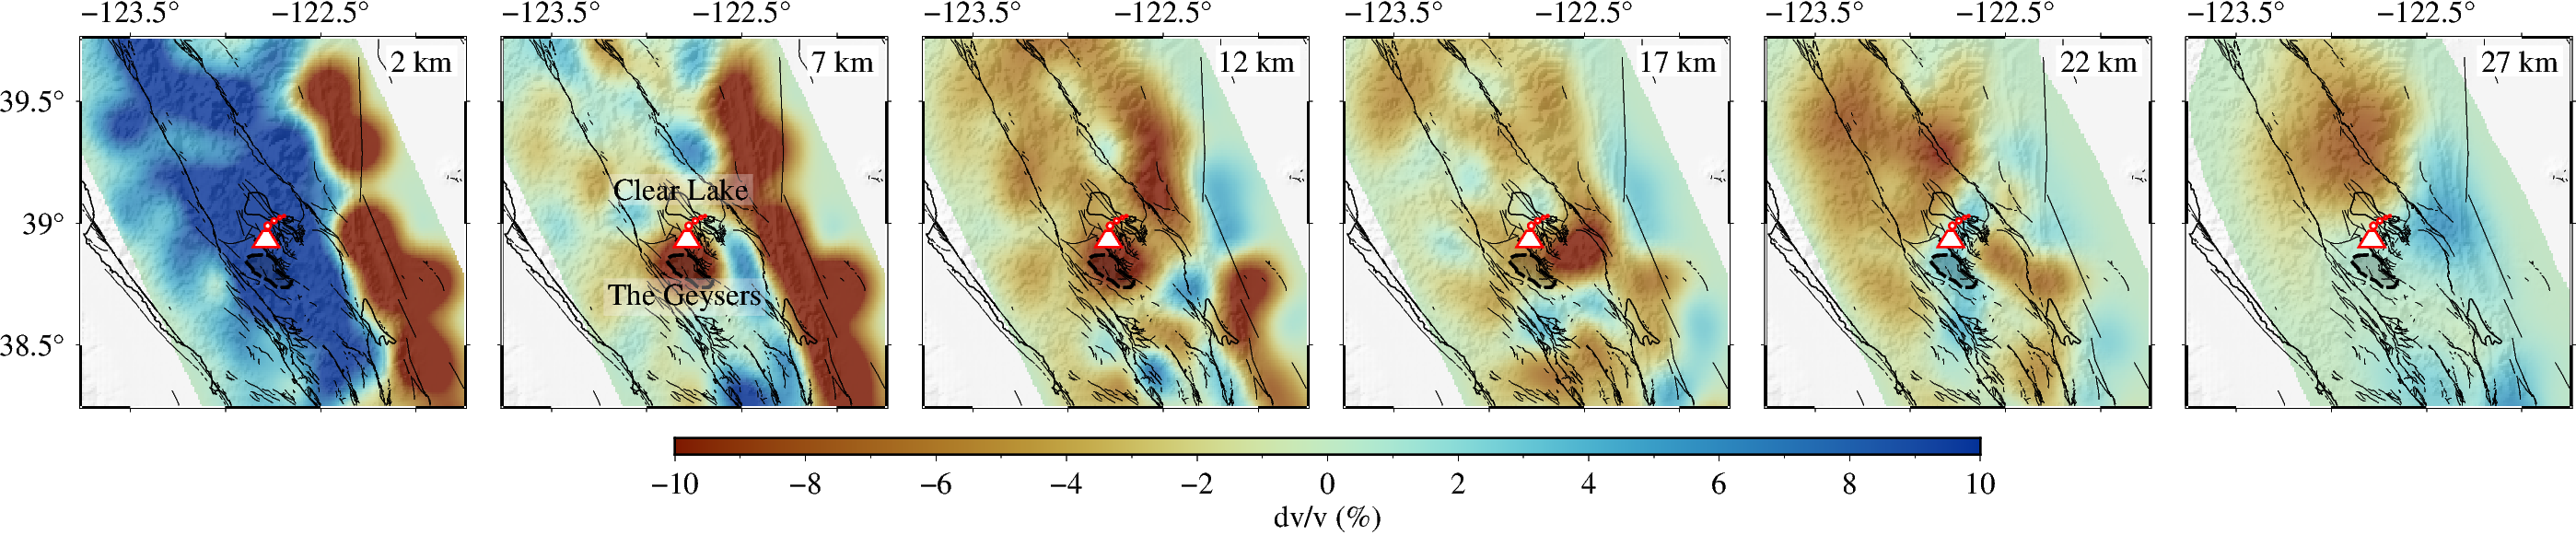

In [39]:
### horizontal slices
# load high-resolution (5 arc-minutes) grid for a specific region
topo_data = load_earth_relief(resolution="30s",region=[minlon, maxlon, minlat, maxlat],registration="gridline")
cmap_topo=f"{ddir}/topo_gray.cpt"

gdf=pd.read_csv(f"{ddir}/GeysersRegion.csv", sep=',', header=0, usecols=[0,1])
gdf.columns=["lon","lat"]

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy",MAP_DEGREE_SYMBOL="degree",MAP_FRAME_WIDTH="0.8p",MAP_FRAME_PEN="0.5p",MAP_TICK_PEN_PRIMARY="0.1p",MAP_TICK_LENGTH_PRIMARY="0.06c")
pygmt.config(FORMAT_GEO_MAP="dddD",IO_SEGMENT_MARKER=">",COLOR_NAN="gray")
pygmt.config(FONT_LABEL="8p,4",MAP_LABEL_OFFSET="0.1c",FONT_ANNOT_PRIMARY="8p,4",FONT_TITLE="10p,4",MAP_TITLE_OFFSET="0.1c")

df=pd.read_csv("./ModelinGEOS", delim_whitespace=True, header=None, usecols=[0,1,2,3,4])
df.columns=["lon","lat","z","vp","dv"]
hdf=pd.read_csv("./hitdvsuminGEOS", delim_whitespace=True, header=None, usecols=[0,1,2,3,4])
hdf.columns=["lon","lat","z","dv","hit"]
count = 500

with fig.subplot(
        nrows=1,
        ncols=6,
        figsize=("9i", "4.5i"),
        autolabel=False,
        margins=["0.0c", "0.0c"],
    ):

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'WsNe'],panel=[0,0])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-2.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text="2 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'wsNe'],panel=[0,1])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-7.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.text(text='Clear Lake', x=-122.77-0.05,y=38.97+0.17, font="8p", fill="snow", transparency="70")
    fig.text(text='Clear Lake', x=-122.77-0.05,y=38.97+0.17, font="8p")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text='The Geysers', x=[-122.8],y=[38.77-0.06], font="8p", fill="snow", transparency="70")
    fig.text(text='The Geysers', x=[-122.8],y=[38.77-0.06], font="8p")
    fig.text(text="7 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'wsNe'],panel=[0,2])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-12.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text="12 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")
    fig.colorbar(position="JMB+o1.95c/0.3c+w12.0c/0.15c+h",frame=['xa2f1+l"dv/v (%)"'])

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'wsNe'],panel=[0,3])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-17.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text="17 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'wsNe'],panel=[0,4])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-22.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text="22 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")

    fig.basemap(region=[minlon, maxlon, minlat, maxlat],projection='M?',
        frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'wsNe'],panel=[0,5])
    fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
    indexu = np.where(abs(df["z"]-27.0)<0.5)
    udf = pd.DataFrame()
    udf["lon"] = hdf["lon"][indexu[0]]
    udf["lat"] = hdf["lat"][indexu[0]]
    udf["hit"] = hdf["hit"][indexu[0]]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["lon"] = df["lon"][indexu[0]]
    udf["lat"] = df["lat"][indexu[0]]
    udf["dv"] = df["dv"][indexu[0]]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
    cmap_vp = pygmt.makecpt(cmap="roma", series=[-10,10.0], reverse=False, background=True)
    fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
    fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
    fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
    fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
    fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
    fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
    fig.text(text="27 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")

fig.savefig("Pmodel_HSlices.jpg",dpi=600)
fig.show()

In [43]:
### extract profile from 3d tomo data 
def profile_prepare(num,count,lon1,lon2,lat1,lat2):
    pro = pygmt.project(center=[lon1, lat1], endpoint=[lon2, lat2], width="-1/1", unit=True, data=[(lon2,lat2,0.0)])
    length = pro[3][0]
    # tomo image along the profile
    img_profile = pygmt.project(center=[lon1, lat1], endpoint=[lon2, lat2], width="-1/1", length=f"0/{length}", unit=True, data="./ModelinGEOS")
    hit_profile = pygmt.project(center=[lon1, lat1], endpoint=[lon2, lat2], width="-1/1", length=f"0/{length}", unit=True, data="./hitdvsuminGEOS")
    udf = pd.DataFrame()
    udf["dist"] = hit_profile[5]
    udf["dep"] = hit_profile[2]
    udf["hit"] = hit_profile[4]
    data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
    pygmt.xyz2grd(data=data_mask, region=[0, length, 0, 32], spacing="0.5/0.5", outgrid="grdmask.nc")
    udf = pd.DataFrame()
    udf["dist"] = img_profile[6]
    udf["dep"] = img_profile[2]
    udf["vp"] = img_profile[3]
    udf["dv"] = img_profile[4]
    udf["mdep"] = img_profile[5]
    data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
    f = open(f"tomoimg_track-{num}.dat","w")
    f.write("{} {} {} {} {}\n".format("dist","dep","vp","dv","mdep"))
    for dist, dep, vp, dv, mdep in list(zip(data_use["dist"],data_use["dep"],data_use["vp"],data_use["dv"],data_use["mdep"])):
        f.write("{:.1f} {:.1f} {:.3f} {:.3f} {:.1f}\n".format(dist,dep,vp,dv,mdep))
    f.close()

In [63]:
### location of profile
p1_pro = pygmt.project(center=[-122.80, 38.85], azimuth=180, generate=1, length="-70/70", unit=True)
p2_pro = pygmt.project(center=[-122.80, 38.85], azimuth=150, generate=1, length="-70/70", unit=True)
p3_pro = pygmt.project(center=[-122.80, 38.85], azimuth=120, generate=1, length="-70/70", unit=True)
p4_pro = pygmt.project(center=[-122.80, 38.85], azimuth=90, generate=1, length="-70/70", unit=True)
p5_pro = pygmt.project(center=[-122.80, 38.85], azimuth=60, generate=1, length="-70/70", unit=True)
p6_pro = pygmt.project(center=[-122.80, 38.85], azimuth=30, generate=1, length="-70/70", unit=True)
print(pygmt.project(center=[-122.80, 38.85], azimuth=0, generate=1, length="-70/70", unit=True))

         r          s   p
0   -122.8  38.220476 -70
1   -122.8  38.229469 -69
2   -122.8  38.238462 -68
3   -122.8  38.247455 -67
4   -122.8  38.256448 -66
..     ...        ...  ..
136 -122.8  39.443552  66
137 -122.8  39.452545  67
138 -122.8  39.461538  68
139 -122.8  39.470531  69
140 -122.8  39.479524  70

[141 rows x 3 columns]


In [64]:
profile_prepare("P1", 500, p1_pro['r'][0], np.array(p1_pro['r'])[-1], p1_pro['s'][0], np.array(p1_pro['s'])[-1])
profile_prepare("P2", 500, p2_pro['r'][0], np.array(p2_pro['r'])[-1], p2_pro['s'][0], np.array(p2_pro['s'])[-1])
profile_prepare("P3", 500, p3_pro['r'][0], np.array(p3_pro['r'])[-1], p3_pro['s'][0], np.array(p3_pro['s'])[-1])
profile_prepare("P4", 500, p4_pro['r'][0], np.array(p4_pro['r'])[-1], p4_pro['s'][0], np.array(p4_pro['s'])[-1])
profile_prepare("P5", 500, p5_pro['r'][0], np.array(p5_pro['r'])[-1], p5_pro['s'][0], np.array(p5_pro['s'])[-1])
profile_prepare("P6", 500, p6_pro['r'][0], np.array(p6_pro['r'])[-1], p6_pro['s'][0], np.array(p6_pro['s'])[-1])

/var/folders/91/0xp84vq54rddkn7k5rt9p3_m0000gn/T/ipykernel_35299/1630049093.py:57: SyntaxWarning: Parameters 'X' and 'xshift' are deprecated since v0.8.0 and will be removed in v0.12.0. Use Figure.shift_origin(xshift=...) instead.
  fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
/var/folders/91/0xp84vq54rddkn7k5rt9p3_m0000gn/T/ipykernel_35299/1630049093.py:57: SyntaxWarning: Parameters 'Y' and 'yshift' are deprecated since v0.8.0. and will be removed in v0.12.0. Use Figure.shift_origin(yshift=...) instead.
  fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
xyz2grd [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
xyz2grd (gmtapi_init_grdheader): Please select compatible -R and -I values
/var/folders/91/0xp84vq54rddkn7k5rt9p3_m0000gn/T/ipykernel_35299/1630049093.py:66: SyntaxWarning: Parameters 'X' and 'xshift' are deprecated since v0.8.0 and will be remov

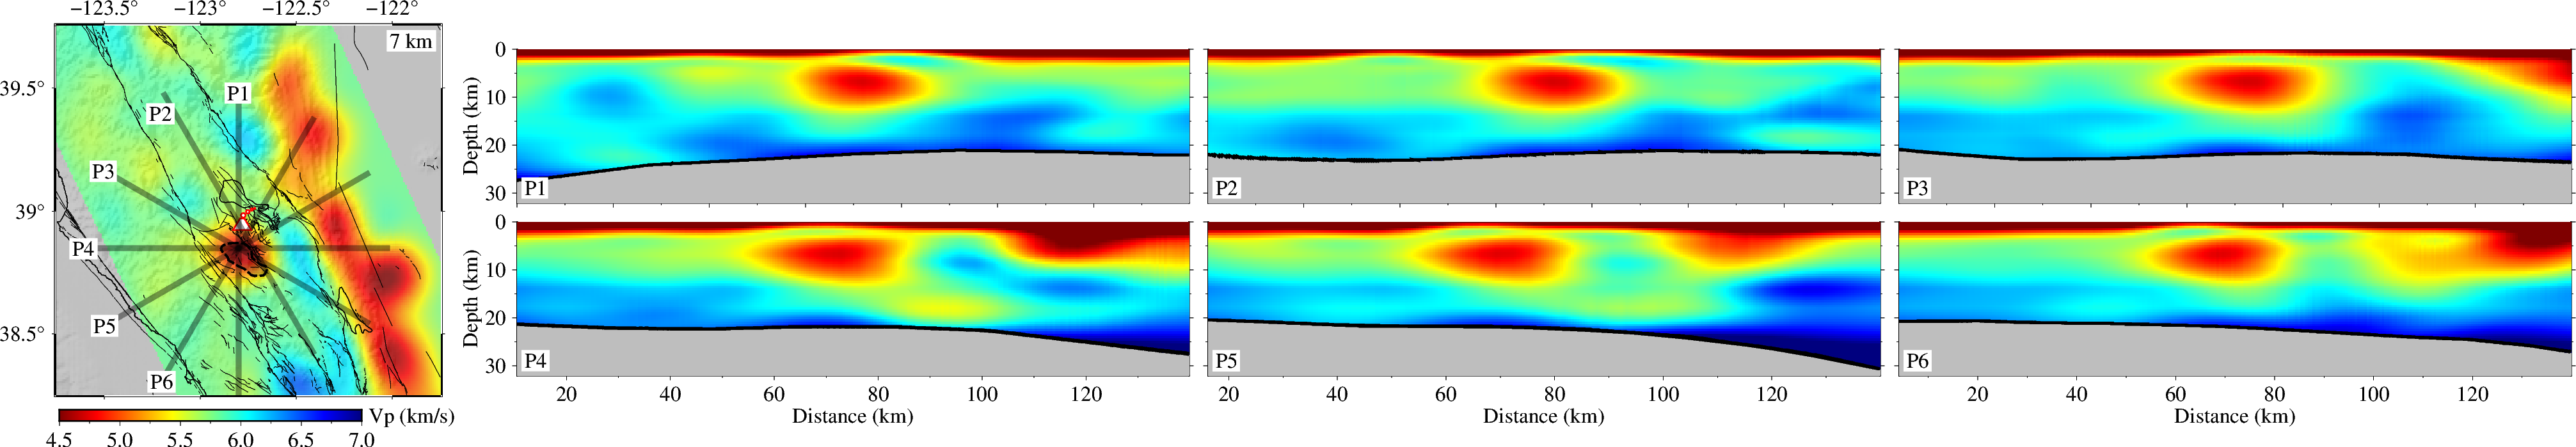

In [66]:
### vertical profiles
topo_data = load_earth_relief(resolution="30s",region=[minlon, maxlon, minlat, maxlat],registration="gridline")
cmap_topo=f"{ddir}/topo_gray.cpt"

gdf=pd.read_csv(f"{ddir}/GeysersRegion.csv", sep=',', header=0, usecols=[0,1])
gdf.columns=["lon","lat"]

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy",MAP_DEGREE_SYMBOL="degree",MAP_FRAME_WIDTH="0.8p",MAP_FRAME_PEN="0.5p",MAP_TICK_PEN_PRIMARY="0.1p",MAP_TICK_LENGTH_PRIMARY="0.06c")
pygmt.config(FORMAT_GEO_MAP="dddD",IO_SEGMENT_MARKER=">",COLOR_NAN="190")
pygmt.config(FONT_LABEL="8p,4",MAP_LABEL_OFFSET="0.1c",FONT_ANNOT_PRIMARY="8p,4",FONT_TITLE="10p,4",MAP_TITLE_OFFSET="0.1c")

fig.basemap(region=[-123.75, -121.75, 38.25, 39.75],projection='M2.0i',
    frame=['xa0.5f0.5+l"lon"', 'ya0.5f0.5+l"lat"', 'WsNe'])
fig.grdimage(grid=topo_data,cmap=cmap_topo,shading=True)
df=pd.read_csv("./ModelinGEOS", delim_whitespace=True, header=None, usecols=[0,1,2,3,4,5])
df.columns=["lon","lat","z","vp","dv","mdep"]
indexu = np.where(abs(df["z"]-7.0)<0.5)
hdf=pd.read_csv("./hitdvsuminGEOS", delim_whitespace=True, header=None, usecols=[0,1,2,3,4])
hdf.columns=["lon","lat","z","dv","hit"]
count = 500
udf = pd.DataFrame()
udf["lon"] = hdf["lon"][indexu[0]]
udf["lat"] = hdf["lat"][indexu[0]]
udf["hit"] = hdf["hit"][indexu[0]]
data_mask = pygmt.select(data=udf, z_subregion=f"{count}/10000000")
pygmt.xyz2grd(data=data_mask, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01", outgrid="grdmask.nc")
udf = pd.DataFrame()
udf["lon"] = df["lon"][indexu[0]]
udf["lat"] = df["lat"][indexu[0]]
udf["vp"] = df["vp"][indexu[0]]
data_use = pygmt.select(data=udf, gridmask="grdmask.nc")
grd = pygmt.xyz2grd(data=data_use, region=[minlon, maxlon, minlat, maxlat], spacing="0.01/0.01")
cmap_vp = pygmt.makecpt(cmap="jet", series=[4.5,7.0], reverse=True, background=True)
fig.grdimage(grid=grd,cmap=cmap_vp,frame=['wsne'],transparency=20)
fig.coast(frame=False,shorelines=True,borders='1/0.2p,black')
fig.plot(data = f"{ddir}/AMFault",pen="0.02p,black")
fig.plot(x=[-122.77],y=[38.97],style="kvolcano",size=[0.30],pen="0.5p,red",fill="white")
fig.plot(x=gdf["lon"], y=gdf["lat"], pen="0.8p,black,4_1:2p")
fig.plot(x=gdf["lon"], y=gdf["lat"], fill="black", transparency=80)
fig.text(text="7 km", position="TR", offset="j0.1c/0.1c", font="8p", fill="white")
fig.plot(x=[-122.80], y=[38.85], style="v0.2c+jc", pen="2p,black", direction=[[180], [4.0]], transparency=60)
fig.plot(x=[-122.80], y=[38.85], style="v0.2c+jc", pen="2p,black", direction=[[210], [4.0]], transparency=60)
fig.plot(x=[-122.80], y=[38.85], style="v0.2c+jc", pen="2p,black", direction=[[240], [4.0]], transparency=60)
fig.plot(x=[-122.80], y=[38.85], style="v0.2c+jc", pen="2p,black", direction=[[270], [4.0]], transparency=60)
fig.plot(x=[-122.80], y=[38.95], style="v0.2c+jc", pen="2p,black", direction=[[300], [4.0]], transparency=60)
fig.plot(x=[-122.80], y=[38.85], style="v0.2c+jc", pen="2p,black", direction=[[330], [4.0]], transparency=60)
fig.text(x=p1_pro['r'][0], y=p1_pro['s'][0], text=f"P1", font="8p", fill="white")
fig.text(x=p2_pro['r'][0], y=p2_pro['s'][0], text=f"P2", font="8p", fill="white")
fig.text(x=p3_pro['r'][0], y=p3_pro['s'][0], text=f"P3", font="8p", fill="white")
fig.text(x=p4_pro['r'][0], y=p4_pro['s'][0], text=f"P4", font="8p", fill="white")
fig.text(x=p5_pro['r'][0], y=p5_pro['s'][0], text=f"P5", font="8p", fill="white")
fig.text(x=p6_pro['r'][0], y=p6_pro['s'][0], text=f"P6", font="8p", fill="white")
fig.colorbar(position="JMB+o-0.5c/0.20c+w4.0c/0.15c+h",frame=['xa0.5f0.25','y+l"Vp (km/s)"'])

tdf = pd.read_csv("tomoimg_track-P1.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'Wse'], xshift="2.4i", yshift="1.00i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=cmap_vp)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P1", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

tdf = pd.read_csv("tomoimg_track-P2.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'wse'], xshift="3.6i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=True)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P2", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

tdf = pd.read_csv("tomoimg_track-P3.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'wse'], xshift="3.6i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=True)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P3", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

tdf = pd.read_csv("tomoimg_track-P4.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'WSe'], xshift="-7.2i", yshift="-0.9i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=True)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P4", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

tdf = pd.read_csv("tomoimg_track-P5.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'wSe'], xshift="3.6i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=True)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P5", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

tdf = pd.read_csv("tomoimg_track-P6.dat", sep=' ', usecols=["dist","dep","vp","dv","mdep"])
fig.basemap(region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32],projection='X3.5i/-0.8i',
    frame=['xa20f10+l"Distance (km)"', 'ya10f5+l"Depth (km)"', 'wSe'], xshift="3.6i")
indexu = np.where(tdf["dep"]<=tdf["mdep"])
grd = pygmt.xyz2grd(data=list(zip(tdf["dist"][indexu[0]],tdf["dep"][indexu[0]],tdf["vp"][indexu[0]])), region=[min(tdf["dist"]), max(tdf["dist"]), 0, 32], spacing="0.5/0.5")
fig.grdimage(grid=grd, cmap=True)
fig.plot(x=tdf["dist"], y=tdf["mdep"], pen="1p,black")
fig.text(text="P6", position="BL", offset="j0.1c/0.1c", font="8p", fill="white")

fig.savefig("Pmodel_Profiles.jpg",dpi=600)
fig.show()